In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## [RQ2] Let's explore the dataset by finding simple insights regarding the profile and posts.

- ## Plot the number of posts for each profile in descending order.

\- We take only the two coloumns (profile_name, n_posts) of interest to us from our DataFrame 'instagram_profiles.csv'

In [2]:
mydata = pd.read_csv('instagram_profiles.csv', sep='\t', usecols=['profile_name', 'firstname_lastname', 'n_posts'])
mydata

,profile_name,firstname_lastname,n_posts
0,jphillip033,John Pierce,170.0
1,mama_haas,Deanna,2878.0
2,yellowlightbreen,Eliza Gray,431.0
3,tec1025,Thomas Clark,NaN
4,luckyfluff,NaN,NaN
...,...,...,...
4509581,karenarkesteyn,Karen Arkesteyn,497.0
4509582,jornvlaeminck,Jorn Vlaeminck,NaN
4509583,s_degol,Sanne Degol,NaN
4509584,anwilms,An Wilms,183.0


\- As we could see in RQ1, in the DataFrame there are many NaN values so now we remove the row of "mydata" where such 'non-values' are present

In [3]:
mydata.dropna(inplace=True)

\- Now we want to sort this coloumn in descending order

In [4]:
mydata.sort_values("n_posts", ascending=False, inplace=True)

In [5]:
mydata

,profile_name,firstname_lastname,n_posts
3990313,jasem33312,jasem33312,183730.0
2571453,koenigpic,Helperwait Studio,142428.0
4338921,rudyanto62,Rudyanto 王耀祝,126340.0
3942129,hometown_ni,AngelsCowboysLakers,125220.0
4219642,dwfitfiber_thailand,เห็นผลตั้งแต่เซ็ตแรกท้าลอง,117262.0
...,...,...,...
1155781,helbertdarech,Helbert Darech,0.0
1155782,ck.jen,Jen CK,0.0
3496357,dinggedingge5,鼎哥鼎哥,0.0
2209858,aini8500,☘️庄薆霓☘️,0.0


<AxesSubplot:xlabel='profile_name'>

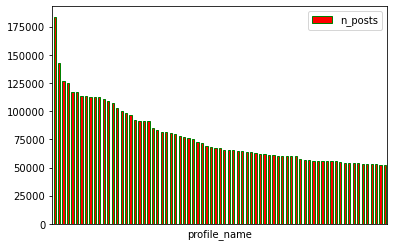

In [6]:
mydata[:75].plot("profile_name", "n_posts", kind="bar", xticks=[], color='red', edgecolor='green')

\- As a final step, let's graph the top 20 profiles with the most posts

<BarContainer object of 25 artists>

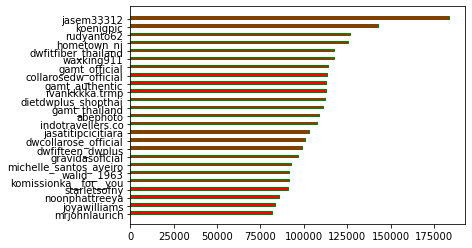

In [7]:
plt.barh(mydata.profile_name.head(25)[::-1], mydata.n_posts.head(25)[::-1], height=0.3, align='edge', color='red', edgecolor='green', )

- ## What posts have the highest number of "likes"?

\- We take only the two coloumns (post_id, numbr_likes) of interest to us from our DataFrame 'instagram_posts.csv'

In [8]:
likes = pd.read_csv('instagram_posts.csv', sep='\t', usecols=['post_id', 'numbr_likes'])

In [9]:
likes

,post_id,numbr_likes
0,BXdjjUlgcgq,80.0
1,BVg0pbolYBC,25.0
2,BRgkjcXFp3Q,9.0
3,BKTKeNhjEA7,4.0
4,8-NQrvoYLX,8.0
...,...,...
42710192,BcpWMWGBfxh,74.0
42710193,Ba6LZWwlCl8,49.0
42710194,BPN0kM1hYUw,18.0
42710195,BxsZ8nDBr-L,27.0


In [10]:
likes.dropna()
likes.sort_values("numbr_likes", ascending=False, inplace=True)

In [11]:
likes.head(25)

,post_id,numbr_likes
19624085,Bt3yaXmAM0d,8822952.0
19623988,BuwffB7g8cK,5447066.0
19624082,Buc1gyZAaMQ,5116398.0
19623986,BvcukE8AMuG,4271466.0
39701024,BqSLFVBFLfq,4264745.0
6293907,BwTSXBKg7gN,3586546.0
19624086,Btw8pFXAvQm,3558599.0
19802016,BvC3n6_gqin,3533326.0
30850564,Bw7vqLrFkHi,3340297.0
39812576,Bw2gTH1AiDA,3311246.0


- ## What posts have the most and the least number of comments?

In [90]:
from tqdm import tqdm
num_comms = pd.DataFrame(columns=['post_id','number_comments'])
for chunk in tqdm(pd.read_csv('instagram_posts.csv', usecols=['post_id','number_comments'], sep='\t', chunksize=500000)):
    most_comms = chunk.sort_values(by='number_comments', ascending=False).head(1)
    least_comms = chunk.sort_values(by='number_comments', ascending=False).tail(1)
    num_comms = pd.concat([num_comms, most_comms])
    num_comms = pd.concat([num_comms, least_comms])
num_comms

86it [01:45,  1.22s/it]


,post_id,number_comments
242837,BQ_N0bzhTSL,135221
0,BXdjjUlgcgq,0
579112,BmORc4znzzA,56686
750000,Bvz4wphAXvf,0
1228385,BT29eW-BHMn,116551
...,...,...
41750000,ByBH0J7CfRa,0
42137979,ByALrvllKrn,34243
42000000,BxjXT1RgAlt,0
42561214,Bx8zGp4FI1O,21585


In [113]:
df_most = pd.DataFrame([num_comms.max()])
df_least = pd.DataFrame([num_comms.min()])

In [123]:
print(f" Post: {df_most.iloc[0, :].post_id} has the most number of comments: {df_most.iloc[0, :].number_comments}")
print(f" Post: {df_least.iloc[0, :].post_id} has the least number of comments: {df_least.iloc[0, :].number_comments}")

 Post: BzuwYJ_n_0u has the most number of comments: 488953
 Post: 0W-Y3uDY29 has the least number of comments: 0


- ## How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

In [136]:
df3 = pd.read_csv('instagram_posts.csv', usecols=['location_id'], sep='\t')


,location,n_posts
0,True,42710197
1,False,42710197


In [138]:
unlocated = df3['location_id'].isnull().count()
located = df3['location_id'].notnull().count()
results = {'location':[True,False], 'n_posts' : [located, unlocated]}
post_loc = pd.DataFrame(results)
post_loc

,location,n_posts
0,True,42710197
1,False,42710197


In [135]:
#df4 = df3.groupby(['location_id'])['location_id'].count()
unlocated=df3['location_id'].isna().count()
unlocated


42710197

- ## How many posts include only photos? How many also have videos?

In [41]:
df4 = pd.read_csv('instagram_posts.csv', usecols=['post_id', 'post_type'], sep='\t', nrows=500000)
df4

,post_id,post_type
0,BXdjjUlgcgq,2
1,BVg0pbolYBC,1
2,BRgkjcXFp3Q,1
3,BKTKeNhjEA7,1
4,8-NQrvoYLX,1
...,...,...
499995,Bgdrw_sBvq-,1
499996,BkwJ6u9h1Td,1
499997,Bx3O0qqBY9v,1
499998,Bqf4IxQg4vF,1


In [54]:
print(f" Number of posts have only photos: {(df4['post_type'] == 1.0).sum()}")
print(f" Number of posts have also videos: {(df4['post_type'] > 1.0).sum()}")

 Number of posts have only photos: 470605
 Number of posts have also videos: 29395


<AxesSubplot:>

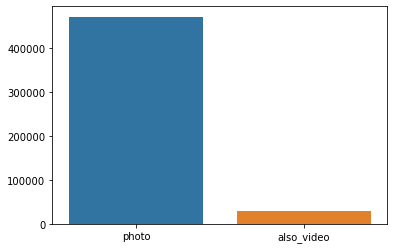

In [57]:
sns.barplot(x=['photo', 'also_video'], y=[(df4['post_type'] == 1.0).sum(), (df4['post_type'] > 1.0).sum()])

- ## What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage? 

In [60]:
df5 = pd.read_csv('instagram_profiles.csv', usecols=['is_business_account'], sep='\t')

In [61]:
df5

,is_business_account
0,False
1,False
2,False
3,NaN
4,NaN
...,...
4509581,False
4509582,NaN
4509583,NaN
4509584,False


In [87]:
df5.fillna(False, inplace=True)
perc_is_business = df5.is_business_account.value_counts(normalize=True)*100
perc_is_business


False    81.034756
True     18.965244
Name: is_business_account, dtype: float64

In [85]:
percentages = is_business / df5.shape[0] * 100
percentages

False    81.034756
True     18.965244
Name: is_business_account, dtype: float64

([<matplotlib.patches.Wedge at 0x16a30325ca0>,
 [Text(-0.9104633068776324, 0.6172977942852592, 'False'),
  Text(0.9104634224687973, -0.6172976237977953, 'True')])

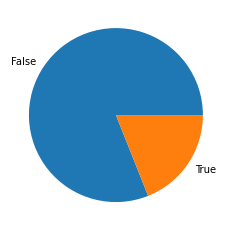

In [88]:
plt.pie(perc_is_business, labels=['False', 'True'])